# Implementing VLM using LangChain and Ollama

In [1]:
from langchain_community.llms import Ollama
llm = Ollama(base_url="http://localhost:11434", model="llava:latest")

## Define helper functions to handle images
1. Load the image using PIL
2. Convert this to base64 encoding using the base64 module

In [2]:
from PIL import Image
import base64
from io import BytesIO

def convert_to_base64(pil_image: Image):
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

def load_image(image_path: str):
    pil_image = Image.open(image_path)
    image_b64 = convert_to_base64(pil_image)
    print("Loaded image successfully!")
    return image_b64

## Testing it out

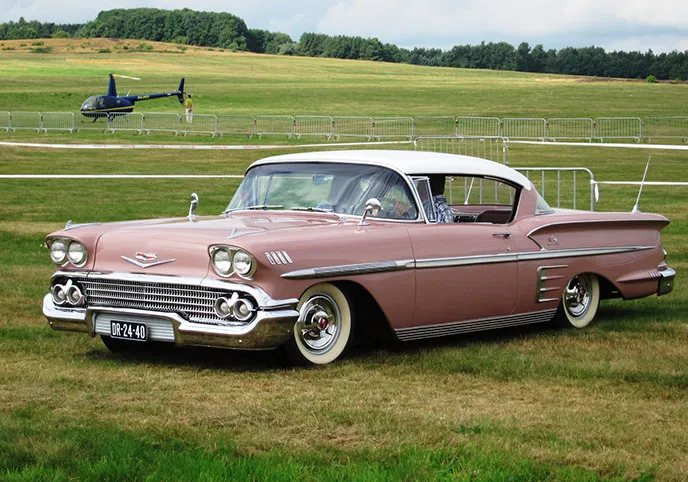

Question: What is in the image?

In [3]:
image_b64 = load_image("./images/chevy.jpg")
resp = llm.invoke("What's in the image?", images=[image_b64])
print(resp)

Loaded image successfully!
 The image shows a vintage car, specifically a Chevrolet Nomad, parked outdoors. It's a classic vehicle known for its unique rear-facing design and is often associated with the 1950s automotive era. The car has a pink or peachy color and chrome details, which were common in the customization styles of that time. There are no people visible in the image; the focus is on the car itself and its surroundings, including what appears to be an airport runway or tarmac in the background with airplanes parked. 
